In [ ]:
function [wave,power,period,scale,coi] = WaveletTransform(y,dt,dj,lowerPeriod,upperPeriod,pad)
%
%  Morlet Wavelet transform of signal y.
%  Decomposition between two periods (lowerPeriod,upperPeriod)
%
%   [wave,power,period,scale,coi] = WaveletTransform(y,dt,dj,lowerPeriod,upperPeriod,pad)
%
%------------ INPUTS
% y           : input signal 
% dt          : sampling rate
% dj          : frequency resolution (ie number of sub-octaves)
% lowerPeriod : lower period of the decomposition
% upperPeriod : upper period of the decomposition
% pad         : in case of zero padding (it must be a power of two)
%
%------------- OUTPUT
%   wave      : wavelet Transform-matrix
%   power     : power wavelet spectrum
%   period    : the vector of "Fourier" periods (in time units)
%             : that corresponds to the scale.s
%   scale     : the vector of scale indices, given by so*2.^((0:j1)*dj), j=0...J1
%               where J1 is the total number of scales.
%   coi       : the "cone-of-influence", which is a vector of n_y points
%               that contains the limit of the region where the wavelet transform
%               is influenced by edge effects.
%
% Mario CHAVEZ                       Bernard CAZELLES
% LENA                               Ecology-Evolution-Mathematics
% CNRS - LPR 640 - 2003              CNRS - UMR 7625 - 2003

ko = 6;
fourier_factor = (4*pi)/(ko + sqrt(2+ko^2));

so = lowerPeriod/fourier_factor;

if (lowerPeriod == -1), so = 2*dt; end
if (dj == -1), dj = 1./4.; end   % coarse

n1 = length(y);
x(1:n1) = y;

% coi = fourier_factor/sqrt(2);  Correction October 2003
% coi = fourier_factor;
%-------------------------------------------------------
coi = fourier_factor;
coi = coi*dt*[1E-5,1:((n1+1)/2-1),fliplr((1:(n1/2-1))),1E-5];

% --------->   zero padding
if (pad == 0)
    base2 = fix(log(n1)/log(2)+0.49999); % power of 2 nearest to N
    x = [x, zeros(1,2^(base2+1)-n1)];
    pad = length(x);
end
if pad > 0
    base2 = log(pad)/log(2);
    if rem(base2,1)
        error('pad must be a power of two')
    else
        x = [x, zeros(1,2^(base2)-n1)];
    end
end
n = length(x);  % new data length after zero padding

%  -----------> Upper Period = max Number of Scales
maxPeriod = n*dt;     % maximum Period allowed = T total
numberofScales = fix((log(upperPeriod/fourier_factor/so)/log(2))/dj);
j1 = numberofScales;
% ------------> If upperPeriod is too long
largestNumberofScales = fix((log(n*dt/so)/log(2))/dj);
if (j1 == -1), j1 = largestNumberofScales, end  %calcul of the # scales
if j1 > largestNumberofScales
    disp('upperPeriod is too long, it will be adapted')
    j1 = largestNumberofScales;
end

k = np.range(1:np.fix(n/2)+1);
k = k.*((2.*pi)/(n*dt));
k = [0., k, -k(fix((n-1)/2):-1:1)];

f = np.fft.fft( x )
    
scale = so*2.^((0:j1)*dj);
Num_scales = j1;
wave = zeros(Num_scales+1, n);
wave = wave + i*wave;
ventana = length(k);
for a1 = 1:Num_scales+1
    scal = scale(a1);
    expnt = -(scal.*k-ko).^2/2.*(k > 0.);
    norm = sqrt(scal*k(2))*(pi^(-0.25))*sqrt(ventana);
    daughter = norm*exp(expnt);
    daughter = daughter.*(k > 0.);
    wave(a1,:) = ifft(f.*daughter);
end
period = fourier_factor*scale;
wave = wave(:, 1:n1);                 % wavelet transform
power   = (abs(wave)).^2 ;            % Wavelet power spectrum

return


Text(0, 0.5, 'Cases - sqrt normalized')

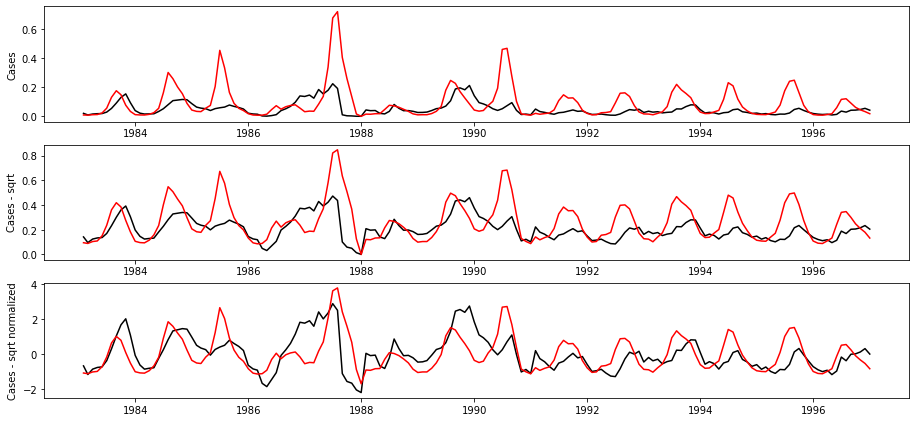

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_dengue         = pd.read_csv('Dengue_Thailand.csv', sep=';')
data_dengue["date"] = pd.date_range(start='1983', end='1997', freq='1M')


fig, ax = plt.subplots(3, 1, figsize=(15.5, 7.2))

ax[0].plot(data_dengue.date, data_dengue.bang, color='k')
ax[0].plot(data_dengue.date, data_dengue.thai, color='r')
ax[0].set_ylabel('Cases')


data_dengue["bang_sqrt"] = np.sqrt(data_dengue["bang"])
data_dengue["thai_sqrt"] = np.sqrt(data_dengue["thai"])

ax[1].plot(data_dengue.date, data_dengue.bang_sqrt, color='k')
ax[1].plot(data_dengue.date, data_dengue.thai_sqrt, color='r')
ax[1].set_ylabel('Cases - sqrt')


data_dengue["bang_sqrt_norm"] = (data_dengue["bang_sqrt"]-data_dengue["bang_sqrt"].mean()) / data_dengue["bang_sqrt"].std()
data_dengue["thai_sqrt_norm"] = (data_dengue["thai_sqrt"]-data_dengue["thai_sqrt"].mean()) / data_dengue["thai_sqrt"].std()

ax[2].plot(data_dengue.date, data_dengue.bang_sqrt_norm, color='k')
ax[2].plot(data_dengue.date, data_dengue.thai_sqrt_norm, color='r')
ax[2].set_ylabel('Cases - sqrt normalized')



In [137]:
import numpy as np
# [wave,power,period,scale,coi] = WaveletTransform(y,dt,dj,lowerPeriod,upperPeriod,pad)

def WaveletTransform(y, dt, dj, lowerPeriod, upperPeriod, pad):
    ''' Morlet Wavelet transform of signal y.
        Decomposition between two periods [lowerPeriod ,upperPeriod]

        ------ input ------
        y           : Input Signal 
        dt          : Sampling Rate
        dj          : Freq. Resolution (i.e. number of sub-octaves)
        lowerPeriod : Lower Period of the decomposition
        upperPeriod : Upper Period of the decomposition
        pad         : In case of zero padding (it must be a power of two)
    
        ------ return ------
        wave      : wavelet Transform-matrix
        power     : power wavelet spectrum
        period    : the vector of "Fourier" periods (in time units)
                  : that corresponds to the scale.s
        scale     : the vector of scale indices, given by so*2.^((0:j1)*dj), j=0...J1
                    where J1 is the total number of scales.
        coi       : the "cone-of-influence", which is a vector of n_y points
                    that contains the limit of the region where the wavelet transform
                    is influenced by edge effects.
    '''

    ko = 6;
    fourier_factor = (4*np.pi)/(ko + np.sqrt(2+ko^2));

    so = lowerPeriod/fourier_factor;

    if (lowerPeriod == -1):
        so = 2*dt 

    if (dj == -1):
        dj = 1./4

    n1 = len(y);
    x  = y;

    coi = fourier_factor;
    coi = coi * dt * np.concatenate(( [1e-5],np.arange(1,((n1+1)/2-1)+1), np.flip( np.arange(1,(n1/2-1)+1)), [1e-5]))

    if (pad == 0):
        base2 = np.fix(np.log(n1)/np.log(2)+0.49999); # power of 2 nearest to N
        x     = np.zeros( (x, np.zeros((1,2**(base2+1)-n1)) ) );
        pad   = len(x);

    if pad > 0:
        base2 = np.log(pad) / np.log(2);
        x = np.concatenate( (x, np.zeros((int(2**(base2))-n1)) ));

    # new data length after zero padding
    n = len(x);  

    # Upper Period = max Number of Scales
    maxPeriod = n*dt;     # maximum Period allowed = T total
    numberofScales = np.fix((np.log(upperPeriod/fourier_factor/so)/np.log(2))/dj);
    j1 = numberofScales
    # If upperPeriod is too long
    largestNumberofScales = np.fix((np.log(n*dt / so) / np.log(2)) / dj);
    if (j1 == -1):
        j1 = largestNumberofScales # compute of the # scales

    if j1 > largestNumberofScales:
        RaiseError('upperPeriod is too long, it will be adapted')
        j1 = largestNumberofScales


    k = np.arange(1, np.fix(n/2)+1);
    k = k*((2.*np.pi)/(n*dt));
    k = np.concatenate( ([0], k, -np.flip(k[:-1]) ) );
    f = np.fft.fft( x )

    scale = so*2**((np.arange(0, j1+1))*dj);
    Num_scales = int(j1);
    wave    = np.zeros( (Num_scales+1, n) );
    wave    = wave + 1j*wave;
    ventana = len(k);

    for a1 in range(0,Num_scales+1):
        scal  = scale[a1];
        expnt = -(scal*k-ko)**2 / 2*(k > 0.);
        norm  = np.sqrt(scal*k[1])*(np.pi**(-0.25))*np.sqrt(ventana);
        daughter   = norm*np.exp(expnt);
        daughter   = daughter*(k > 0.);
        wave[a1,:] = np.fft.ifft(f*daughter);


    period = fourier_factor*scale;
    wave   = wave[:, :n1];                 # wavelet transform
    power  = (abs(wave))**2 ;      
    
    return wave, power, period, scale,coi

In [180]:
import math
def WaveletOutput(wave,power,period,scale,y,variance,dt,dj,lowPF,upPF):
    
    n = len(y);
    del_ = 0.776;
    avg = find((scale >= lowPF) & (scale < upPF));

    realwav = np.real(wave) ;                # Real part of the wavelet
    imagwav = np.imag(wave) ;                # Imaginary part of the wavelet

    global_ws = variance*(sum(power.T)/n); # Global wavelet spectrum
                                           # ie time-average over all times

    filtr_ts = np.repeat(np.expand_dims(np.sqrt(scale),-1), axis=1, repeats=n) ;   # Filtered time series
    filtr_ts = realwav / filtr_ts;       # based on periods between lowPF--upPF
    filtr_ts = np.pi**(1/4)*dj*np.sqrt(dt) / del_ * np.sum(filtr_ts[avg,:]); 

    filtr_var =  np.repeat(np.expand_dims( scale,-1), axis=1, repeats=n);       # Filtered variance of the time series
    filtr_var = power / filtr_var;       # based on periods between lowPF--upPF
    filtr_var = variance * dj * dt / del_ * np.sum(filtr_var[avg,:]); 
    phase_ts = np.arctan2(imagwav,realwav); # Phase of the time series
    phase_ts = np.mean(phase_ts[avg,:]);     # based on periods between lowPF--upPF

    
    return realwav, imagwav, global_ws, filtr_ts, filtr_var, phase_ts



In [ ]:
def WaveletTest(y,var_y,power,dt,dj,scale,lowP,upP,lowPF,upPF,pad,test,ns,ps,nbin,amp);
    '''
      Statistical tests for same "outputs" of the wavelet transform of the series y
                              by different boostrapping approaches (test=1,2,3,4,5,6,7,8)
                              or by comparison with white or red noise with AR (test=10,11)
                              or by comparison with white or red noise (test=12,13)
    
      [pv5,pv1,gm5_ws,gm1_ws,fm5_var,fm1_var] = ...
         WaveletTest(y,var_y,power,dt,dj,scale,lowP,upP,lowPF,upPF,pad,test,ns,ps,nbin,amp)
    
    --------- INPUTS
     y        : input time series
     var_y    : variance of y
     power    : power wavelet spectrum
     dt       : observation time step
     dj       : frequency resolution (ie number of sub-octaves)
     scale    : vector of the wavelet scale employed during the computation 
     lowP     : lower period of the decomposition
     upP      : upper period of the decomposition
     lowPF    : lower value of the period used for filtering some of the output 
                (filtr_ts, filtr_var, phase_ts)
     upPF     : upper value of the period used for filtering some of the output
                (filtr_ts, filtr_var, phase_ts)
     pad      : in case of zero padding (it must be a power of two)
     test     : test options: 
                .  1 simple bootstrap
                .  2 bootstrap by block after block randomization
                .  3 bootstrap by block and random start
                .  4 bootstrap by block with random block with a mean length 
                .  5 surrogate with Hidden Markow Model
                .  6 surrogate with simple shuffling
                .  7 surrogate with Fourier randomization
                .  8 surrogate with Fourier gaussian amplitude-adjusted
                .  9 surrogate with identical slope of the spectrum (beta) and gaussian amplitude-adjusted
                . 10 comparison with white noise, 11 with red noise, 12 AR(p) (AR(0) ou AR(1) ou AR(p))
                . 13 comparison with white noise, 14 with red noise           (ANALYTIC COMPUTATION)
                  for 12 and 13, the parameter ps is the order of the AR(p), ie p=ps 
                . 17 wavelet surrogate with gaussian phase randomization
                . 18 wavelet surrogate with gaussian phase randomization and amplitude-adjusted
     ns       : number of surrogate or boostrapped series
     ps       : length of block or probability of changing block for the boostrap functions
                or the parameter the order of the AR(p), ie p=ps
     nbin     : number of bin used for the distribution of the raw series in test=5
     amp      : power of de 10 for the minima and maxima computations (example amp=10)
    
    --------- OUTPUT
     pv5      : matrice of the Pvalue of the power wavelet, for test = 12,13 it's just the 5% level
     pv1      : matrice of the Pvalue of the power wavelet, for test = 12,13 it's just the 1% level
     gm5_ws   : 5% significance level for the average wavelet spectrum of y
     gm1_ws   : 1% significance level for the average wavelet spectrum of y
     fm5_var  : 5% significance level for the average variance of the series
     fm1_var  : 1% significance level for the average variance of the series
    

    '''


    n_y = len(y);
    del_ = 0.776;
    avg = find((scale >= lowPF) and (scale < upPF));
    n = size(power);
    nl = n(1);
    nc = n(2);

    pv5 = np.zeros(n);
    gws = np.zeros(1,nl);
    gm_ws = np.zeros(1,nl);
    gs2_ws = np.zeros(1,nl);
    fvb = np.zeros(1,nc);
    m_fvb = np.zeros(1,nc);
    m2_fvb = np.zeros(1,nc);

    if test == 13 or test==14

        if abs(mean(y)) > 0.0000001:
            print('the use of noise tests needs signal with zero mean        \n')
            print('you will not be able to interpret the results of the test \n')
            print('you must employ bootstrap approaches or normalized signal \n')
        if test == 13:
            lag = 0;
        elif test == 14
            lag = 1;
            
            pv5, pv1, gm5_ws,gm1_ws,fm5_var,fm1_var = WaveletTestNoise(y,var_y,lag,dt,dj,scale,lowPF,upPF);

            pv5     = (pv5.T) * np.ones(1,n_y);
            pv5     = 0.05 * pv5 / power;         #   pv5 = power./pv5; 
            pv1     = (pv1.T) * np.ones(1,n_y);   #   pv1 = power./pv1;
            pv1     = 0.01 * pv1 / power;
            fm5_var = fm5_var * np.ones(1,n_y);
            fm1_var = fm1_var * np.ones(1,n_y);

    elseif test < 19 

       for i=1:ns
          if test==1
             yb = BootsBloc(y,1);
          elseif test==2
             yb = BootsFixe(y,ps);
          elseif test==3
             yb = BootsFix2(y,ps);
          elseif test==4
             yb = BootsBloc(y,ps);
          elseif test==5
             if i==1; [nw,nb,vbin,trans] = ProbaTransition(y,n_y,nbin,amp); end
             yb = SurrogateHMM(y,n_y,nbin,2,nw,nb,vbin,trans);
          elseif test==6
             yb  = Shuffling(y,sum(1000*clock));
          elseif test==7
             yb  = FourierSurrogate1(y,sum(1000*clock));
          elseif test==8
             yb = FourierSurrogate2(y,sum(2000*clock));
          elseif test==9
             if ps < 1; ps = 1; end
             if ps > 3; ps = 1; end
             yb = BetaSurrogate(y,ps,dt,sum(1000*clock));
          elseif test==10
             if abs(mean(y)) > 0.0000001
               fprintf('the use of noise tests needs signal with zero mean        \n')
               fprintf('you will not be able to interpret the results of the test \n')
               fprintf('you must employ bootstrap approaches or normalized signal \n')
             end
             yb = ARSurrogateSerie(y,0,sum(1000*clock));
             yb = (yb-mean(yb))/std(yb);
          elseif test==11
             if abs(mean(y)) > 0.0000001
               fprintf('the use of noise tests needs signal with zero mean        \n')
               fprintf('you will not be able to interpret the results of the test \n')
               fprintf('you must employ bootstrap approaches or normalized signal \n')
             end
             yb = ARSurrogateSerie(y,1,sum(1000*clock));
             yb = (yb-mean(yb))/std(yb);
          elseif test==12
             if abs(mean(y)) > 0.0000001
               fprintf('the use of noise tests needs signal with zero mean        \n')
               fprintf('you will not be able to interpret the results of the test \n')
               fprintf('you must employ bootstrap approaches or normalized signal \n')
             end
             yb = ARSurrogateSerie(y,ps,sum(1000*clock));
             yb = (yb-mean(yb))/std(yb);
          elseif test==17
             yb = WaveletSurrogate1(y,dt,dj,lowP,upP,pad,sum(100*clock));
          elseif test==18
             yb = WaveletSurrogate2(y,dt,dj,lowP,upP,pad,sum(200*clock));
          end
          [wb,powb,period,scale] = WaveletTransform(yb,dt,dj,lowP,upP,pad);     
          for j=1:nl
          for k=1:nc
             if powb(j,k) >= 1*power(j,k)
                pv5(j,k) = pv5(j,k) + 1;
             end
          end
          end
          gws = var_y*(sum(powb')/n_y);
          gm_ws = gm_ws + gws;
          gs2_ws = gs2_ws + gws.^2;
          fvb = scale'*(ones(1,nc));
          fvb = powb ./ fvb;
          fvb = var_y*dj*dt/del*sum(fvb(avg,:));
          m_fvb = m_fvb + fvb;
          m2_fvb = m2_fvb + fvb.^2;
       end

       pv5 = pv5/ns;
       pv1 = pv5;
       % the use of abs() is due to the case when is=7 with variance around 10^-8 but in some case negative !
       gm5_ws = gm_ws/ns + 1.645*sqrt(abs(gs2_ws - gm_ws.^2/ns)/(ns-1));
       gm1_ws = gm_ws/ns + 2.326*sqrt(abs(gs2_ws - gm_ws.^2/ns)/(ns-1));
       fm5_var = m_fvb/ns + 1.645*sqrt(abs(m2_fvb - m_fvb.^2/ns)/(ns-1));
       fm1_var = m_fvb/ns + 2.326*sqrt(abs(m2_fvb - m_fvb.^2/ns)/(ns-1));

    end

return pv5, pv1, gm5_ws, gm1_ws, fm5_var, fm1_var


In [195]:
def WaveletRidge(m, nb=2, amp=0):
    '''
      Calculation of the maxima of the matrice m, 
      these maxima are named RIDGE in the context of Wavelet Analysis
      a test has been introduce to plot just the value > amp*max
    
       rp = WaveletRidge(m,nb,amp)
    
    ----- INPUTS
     m    : the matrice for which one has to compute the ridges
     nb   : number of point used to compute a maximum, in fact 2*nb+1 points are used
     amp  : proportion of maximum value than one needs for plotting
    
    ----- OUTPUT
     rg   : ridge values approximated by the maximum of the matrice m

  
    '''

    if nb == 0:
        nb = 2

    s  = m.shape;
    nl = s[0];
    nc = s[1];
    rg = np.zeros(s);
    mm = amp*np.max(m[:]);

    for j in range(nc):
        for i in range(nb,nl-nb+1):
            if np.max(m[i-nb:i+nb,j]) == m[i,j] and m[i,j] > mm: 
                rg[i,j] = 1;

        for i in range(nb+1):
            if np.max(m[:i+nb,j]) == m[i,j] and m[i,j] > mm:
                rg[i,j] = 1
       
        for i in range(nl-nb,nl):
            if np.max(m[i-nb:nl,j]) == m[i,j] and m[i,j] > mm:
                rg[i,j] = 1;

    return rg



/Users/chaosdonkey06/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Cases')

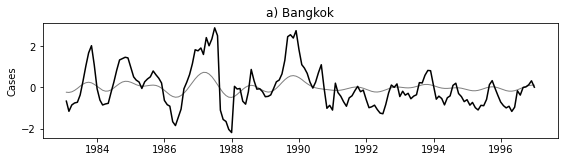

In [208]:
# wavelets parameters
dt = 1/12; dj = 1/30; pad = 256; stype = 1; wtype = 5; par = 0;
lowerPeriod=0.8; upperPeriod=7;
lowerPF = 2; upperPF = 3;
#rand('seed',1997); nh = 20; dh = (-pi:pi/nh:pi);
testx = 1; test = 1; ns = 200; pvalue = 5; nbb = 1; ps = 1; psx = 1; psy = 1; amp = 10; 
#Yticks = [1 2 3 4 6 8]; cor = 100; ipp = 0.5;

x = data_dengue["bang_sqrt_norm"].values;   # Bangkok
N = len(dat_norm)
t = data_dengue.date

# wavelets trasfrorm and associated statistical test
wave, power, period, scale, coi = WaveletTransform(x, dt, dj, lowerPeriod, upperPeriod, pad);


# 
n_x = len(x); m_x = np.mean(x); var_x = np.std(x)**2;
realwav,imagwav,global_ws,filtr_ts,filtr_var,phase_t1 = WaveletOutput(wave,power,period,scale,x,var_x,dt,dj,lowerPF,upperPF);

rid = WaveletRidge(power,3,.14);



# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t,  , '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, x, 'k', linewidth=1.5)
ax.set_title('a) Bangkok')
ax.set_ylabel(r'Cases')




# Bang

/Users/chaosdonkey06/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


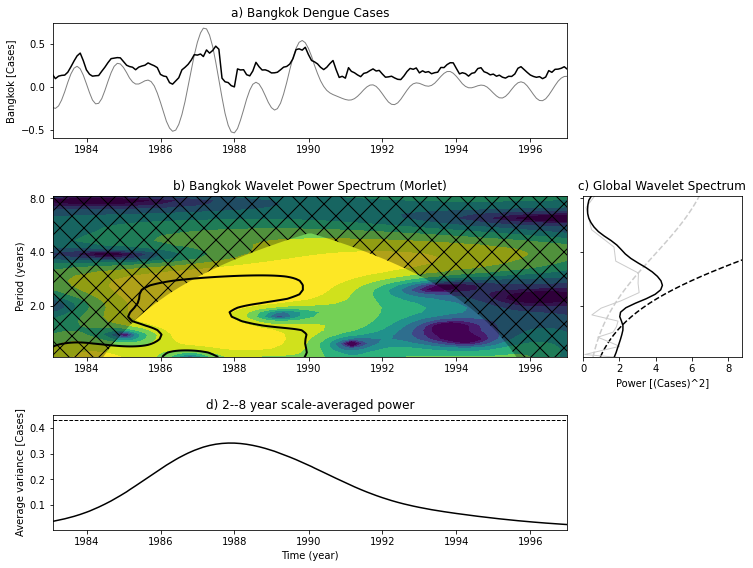

In [238]:
import datetime


dt = 1/12; dj = 1/30; pad = 256; stype = 1; wtype = 6; par = 0;


dat= data_dengue["bang_sqrt"].values;

mother = wavelet.Morlet(6)
s0 = stype  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 3 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

dat_norm = data_dengue["bang_sqrt_norm"].values;   # Bangkok

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)

N = len(data_dengue)
t = data_dengue.date

sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# Then, we calculate the global wavelet spectrum and determine its
# significance level.
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

# We also calculate the scale average between 2 years and 8 years, and its
# significance level.
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

title = 'Bangkok Dengue Cases'
label= 'Bangkok'
units= 'Cases'

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)

t = data_dengue.date
dt_date = datetime.timedelta(weeks=4)
bx.fill(numpy.concatenate([t, t[-1:] + dt_date, t[-1:] + dt_date,
                           t[:1] - dt_date, t[:1] - dt_date]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

# Rest of thailand

/Users/chaosdonkey06/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


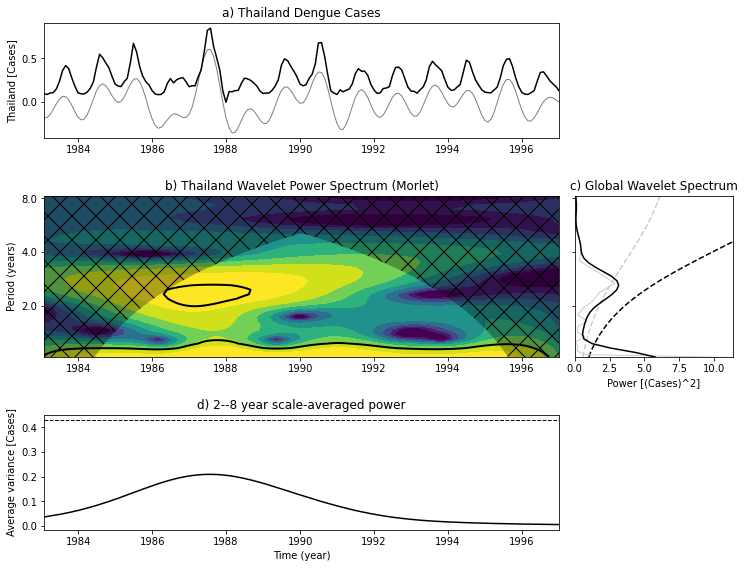

In [251]:
import datetime



dt = 1/12; dj = 1/30; pad = 256; stype = 1; wtype = 6; par = 0;


dat= data_dengue["thai_sqrt"].values;

mother = wavelet.Morlet(6)
s0 = stype  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 3 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise



dat_norm = data_dengue["thai_sqrt_norm"].values;   # Bangkok

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)

N = len(data_dengue)
t = data_dengue.date

sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# Then, we calculate the global wavelet spectrum and determine its
# significance level.
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

# We also calculate the scale average between 2 years and 8 years, and its
# significance level.
sel = find((period >= 2) & (period < 8))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

title = 'Thailand Dengue Cases'
label= 'Thailand'
units= 'Cases'

# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)

t = data_dengue.date
dt_date = datetime.timedelta(weeks=4)
bx.fill(numpy.concatenate([t, t[-1:] + dt_date, t[-1:] + dt_date,
                           t[:1] - dt_date, t[:1] - dt_date]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
cx.plot(glbl_signif, numpy.log2(period), 'k--')
cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()